In [2]:

import sys
import types
import pip

if not('ibm-cos-sdk' in [package.project_name for package in pip.get_installed_distributions()]):
    !pip install ibm-cos-sdk==2.0.0 -q

import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_ed242f131190443faa76f72cd4fca435 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BqgI537w-a48Eng_9eTLj66m1RqOveJjrSk4t6P5qWO9',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ed242f131190443faa76f72cd4fca435.get_object(Bucket='weathertrendsdata-donotdelete-pr-u1eei3zwsifxwx',Key='RiyadhWeather.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Riyadh_df = pd.read_csv(body)
Riyadh_df.head()



,year,city,country,avg_temp
0,1843,Riyadh,Saudi Arabia,24.74
1,1844,Riyadh,Saudi Arabia,15.45
2,1845,Riyadh,Saudi Arabia,20.82
3,1846,Riyadh,Saudi Arabia,NaN
4,1847,Riyadh,Saudi Arabia,NaN


In [3]:

body = client_ed242f131190443faa76f72cd4fca435.get_object(Bucket='weathertrendsdata-donotdelete-pr-u1eei3zwsifxwx',Key='globalWeather.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

global_df = pd.read_csv(body)
global_df.head()



,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [32]:
# Calculate moving average for riyadh weather

Riyadh_df['MovingAverage'] = Riyadh_df['avg_temp'].rolling(window=5).mean()
Riyadh_df.head(20)

,year,city,country,avg_temp,MovingAverage
0,1843,Riyadh,Saudi Arabia,24.74,NaN
1,1844,Riyadh,Saudi Arabia,15.45,NaN
2,1845,Riyadh,Saudi Arabia,20.82,NaN
3,1846,Riyadh,Saudi Arabia,NaN,NaN
4,1847,Riyadh,Saudi Arabia,NaN,NaN
5,1848,Riyadh,Saudi Arabia,24.56,NaN
6,1849,Riyadh,Saudi Arabia,24.80,NaN
7,1850,Riyadh,Saudi Arabia,24.34,NaN
8,1851,Riyadh,Saudi Arabia,25.03,NaN
9,1852,Riyadh,Saudi Arabia,24.85,24.716


In [30]:
# Calculate moving average for global weather

global_df['MovingAverage'] = global_df['avg_temp'].rolling(window=5).mean()
global_df.head(20)

,year,avg_temp,MovingAverage
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868
5,1755,8.36,7.796
6,1756,8.85,7.970
7,1757,9.02,8.618
8,1758,6.74,8.288
9,1759,7.99,8.192


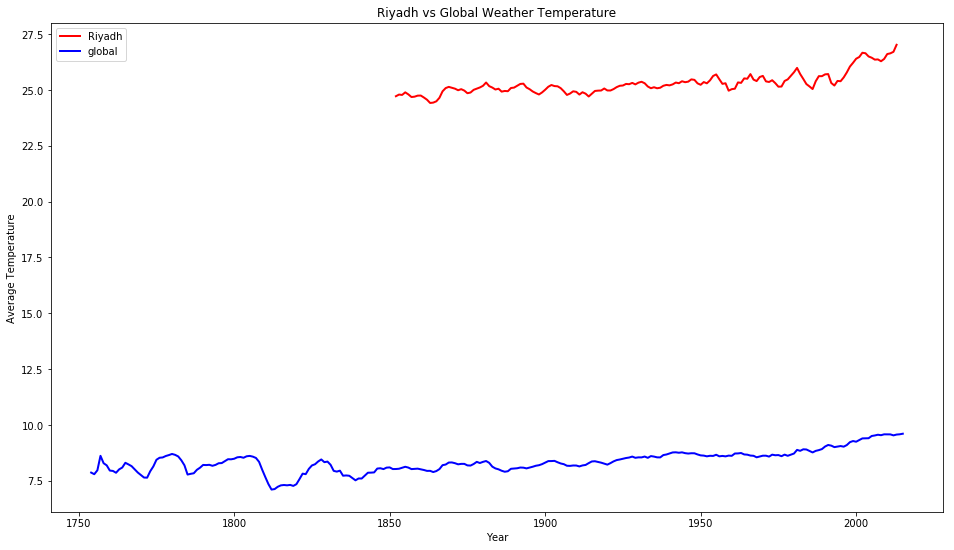

In [34]:
# Multiple line plot
import matplotlib.pyplot as plt

fig, weather = plt.subplots(figsize=(16,9))

weather.plot( 'year', 'MovingAverage', data=Riyadh_df,  marker='', color='red', linewidth=2, label="Riyadh")
weather.plot( 'year', 'MovingAverage', data=global_df , marker='', color='blue', linewidth=2, label ="global")

weather.set_ylabel('Average Temperature')
weather.set_xlabel('Year')
weather.set_title('Riyadh vs Global Weather Temperature' )


weather.legend()


In [55]:
high_riyadh = Riyadh_df.nlargest(10,'avg_temp')
print('Highest Riyadh Temperature')
print(high_riyadh)
print('\n')

high_global = global_df.nlargest(10,'avg_temp')
print('Highest Global Temperature')
print(high_global)

Highest Riyadh Temperature
     year    city       country  avg_temp  MovingAverage
170  2013  Riyadh  Saudi Arabia     27.78         27.018
167  2010  Riyadh  Saudi Arabia     27.37         26.604
156  1999  Riyadh  Saudi Arabia     26.92         26.212
169  2012  Riyadh  Saudi Arabia     26.83         26.704
155  1998  Riyadh  Saudi Arabia     26.73         26.044
166  2009  Riyadh  Saudi Arabia     26.71         26.384
158  2001  Riyadh  Saudi Arabia     26.67         26.472
160  2003  Riyadh  Saudi Arabia     26.62         26.640
157  2000  Riyadh  Saudi Arabia     26.55         26.394
164  2007  Riyadh  Saudi Arabia     26.49         26.364


Highest Global Temperature
     year  avg_temp  MovingAverage
265  2015      9.83          9.608
257  2007      9.73          9.562
255  2005      9.70          9.506
260  2010      9.70          9.580
263  2013      9.61          9.570
252  2002      9.57          9.398
264  2014      9.57          9.582
253  2003      9.53          9.400
25